In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex. tools import input_factory, plot_tools
exp_IF.simulate_exponential_IF_neuron


Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 27
spikes times: [ 0.5068  0.5151  0.5239  0.5332  0.5432  0.5539  0.5654  0.5778  0.5913
  0.6061  0.6224  0.6404  0.6601  0.6813  0.7037  0.7268  0.7502  0.7739
  0.7976  0.8214  0.8452  0.869   0.8929  0.9167  0.9405  0.9643  0.9882] s


WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Renan\.cython\brian_extensions\_cython_magic_27b00bb86644851871cb5598a1fc7683.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manua

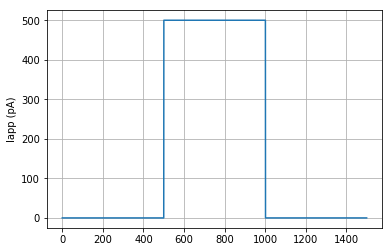

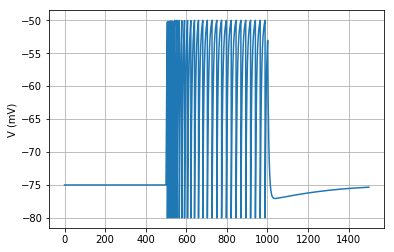

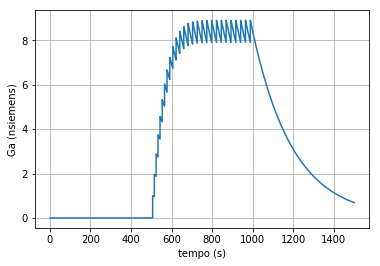

In [2]:

"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
membrane_resistance = 100*b2.Mohm #RM
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #VL

E_k = -80*b2.mV

tau_Gref = 200*b2.ms
deltaG = 1*b2.nsiemens
Gref_0 = 0*b2.nsiemens

simulation_time = 1500
dt =  0.01 * b2.ms 

#current = 200.01 * b2.pamp
current = 500
input_current = input_factory.get_step_current(
t_start=500, t_end=1000, unit_time=b2.ms,
amplitude=current*b2.pA) 
# differential equation of Leaky Integrate-and-Fire model
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (input_current(t,i)/membrane_capacitance) ) : volt
"""


# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset; Gref=Gref+deltaG", threshold="v>firing_threshold",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Gref = Gref_0

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v", "Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

#graph_c, graph_c = plot_tools.plot_voltage_and_current_traces(
#state_monitor, input_current, title="min input", firing_threshold=firing_threshold)
# for t in spike_monitor.t:
#    graph_c.axvline(t/b2.ms, ls='--', c='C1', lw=3)   
print("nr of spikes: {}".format(spike_monitor.count[0]))
print("spikes times: {}".format(spike_monitor.t[:]))
#assert isinstance(current, b2.TimedArray), "current is not of type TimedArray"
#axis_c = plt.subplot(311)
plt.figure(1)
c = input_current(state_monitor.t, 0)
plt.plot(state_monitor.t/b2.ms, c/b2.pA )
plt.ylabel('Iapp (pA)')
plt.grid()
plt.figure(2)
#axis_v = plt.subplot(312)
plt.plot(state_monitor.t/b2.ms, state_monitor.v[0]/b2.mV)
#plt.plot(
#    (state_monitor.t / b2.ms)[[0, -1]],
#    [firing_threshold / b2.mV, firing_threshold / b2.mV],
#    "r--", lw=2
#)
plt.ylabel('V (mV)')
plt.grid()
#plt.legend(["vm", "firing threshold"], fontsize=12)
plt.figure(3)
#axis_v = plt.subplot(313)
plt.plot(state_monitor.t/b2.ms, state_monitor.Gref[0]/b2.nsiemens)
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('Ga (nsiemens)')
#plt.plot(state_monitor.t,state_monitor.Vth[0]/b2.mV, "--") 
#plt.plot(neuron.current/b2.pA, spike_monitor.count/simulation_time)
plt.show()

30
nr of spikes: <spikemonitor_1.count: array([ 53,  61,  70,  78,  87,  95, 103, 111, 120, 128, 136, 144, 152,
       160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 239, 247, 255,
       263, 271, 278, 286])>
spikes times: [    5.4     5.6     5.7 ...,  4997.7  4998.8  4999.8] ms
spikes train: 17.8 ms
[23.529411764705884, 32.36245954692557, 39.06249999999999, 44.84304932735426, 50.0, 54.644808743169385, 59.171597633136074, 63.694267515923556, 68.02721088435375, 71.94244604316546, 76.3358778625954, 80.0, 84.03361344537815, 87.71929824561403, 91.74311926605502, 95.23809523809521, 99.009900990099, 103.09278350515464, 106.38297872340424, 109.89010989010988, 113.63636363636363, 117.6470588235294, 120.48192771084337, 125.00000000000003, 128.2051282051282, 131.57894736842104, 135.1351351351351, 138.88888888888886, 142.85714285714286, 144.92753623188406]
[10.277492291880717, 11.918951132300377, 13.531799729363991, 15.174506828528056, 16.80672268907541, 18.416206261509974, 20.00000000000007

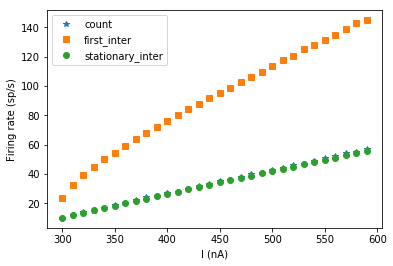

In [21]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -75*b2.mV #EL
v_reset= -80*b2.mV #Vreset
membrane_resistance = 100*b2.Mohm #RM
membrane_capacitance = 100*b2.pF #CM
firing_threshold = -50 * b2.mV #VL

E_k = -80*b2.mV

tau_Gref = 200*b2.ms
deltaG = 1*b2.nsiemens
Gref_0 = 0*b2.nsiemens

simulation_time = 5
dt =  0.01 * b2.ms 

#current = 200.01 * b2.pamp

#current = [100., 200, 200.01, 250, 300, 350, 400, 450, 500, 600]
current = np.arange(300, 600, 10)
print(len(current))
eqs = """
dGref/dt = -Gref/tau_Gref : siemens
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (Gref *(E_k - v))/membrane_capacitance + (current/membrane_capacitance) ) : volt
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset; Gref=Gref+deltaG", threshold="v>firing_threshold",
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.Gref = Gref_0
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v","Gref"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
input_current = [None]*len(current)
# for i in range(len(current)):
#     input_current[i] = input_factory.get_step_current(t_start=0, t_end=simulation_time, unit_time=b2.second,
#     amplitude= current[i]*b2.nA) 
#     plot_tools.plot_voltage_and_current_traces(
#     state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))

print("spikes train: {}".format(spike_monitor.spike_trains()[0][0]))

first_inter = [None]*len(current)
stationary_inter = [None]*len(current)
for i in range(len(current)):
    first_inter[i] = 1/(float(spike_monitor.spike_trains()[i][2]) - float(spike_monitor.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spike_monitor.spike_trains()[i][-2]) - float(spike_monitor.spike_trains()[i][-3]))
    
print(first_inter)
print(stationary_inter)
plt.plot(neuron.current/b2.pA, spike_monitor.count/simulation_time, '*', label='count')
plt.plot(neuron.current/b2.pA, first_inter/b2.second, 's', label='first_inter')
plt.plot(neuron.current/b2.pA, stationary_inter/b2.second, 'o', label='stationary_inter')
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()
print(spike_monitor.count)
# plt.figure(3)
# plt.plot(neuron.current/b2.pA, neuron.v/b2.mV)
# #plt.plot(neuron.current/b2.pA, spike_monitor.count[1]/simulation_time)
# plt.xlabel('I (nA)')
# plt.ylabel('Voltage (V)')
# plt.show()
# 
# plt.figure(4)
# plt.plot(spike_monitor.count/simulation_time, neuron.v/b2.mV)
# plt.xlabel('Firing rate (sp/s)')
# plt.ylabel('Voltage (V)')
# plt.show()